In [1]:
import fns
from fns import *
from fns.functionsTFhardbound import *
%matplotlib inline

today = datetime.date.today()
todayStr = '%04d%02d%02d' % (today.year, today.month, today.day)
# todayStr = '20151005'
DIRECTORY = os.path.expanduser("~/Dropbox/0000_PhD/figures/"+todayStr+"/")
CSV_DIR_TODAY = os.path.expanduser("~/Dropbox/0000_PhD/csv/"+todayStr+"/")
CSV_DIR = os.path.expanduser("~/Dropbox/0000_PhD/csv/")
FIG_DIR = os.path.expanduser("~/Dropbox/0000_PhD/figures/")
if not os.path.exists(DIRECTORY):
    os.makedirs(DIRECTORY)
    
# from bokeh.io import output_notebook
# from bokeh.plotting import figure, show, output_file
# output_notebook()
from IPython.display import clear_output, Image, display

********************************************************************************
functionsTFhardbound loaded!
********************************************************************************


In [2]:
PAPER = os.path.expanduser('~/Dropbox/ICL-2014/Presentations/2016-10-11-GJ-sync-paper/figures/')

In [3]:
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
# matplotlib.rc("font", family="Times")

## Colors

In [4]:
N1 = '#65CBFF'
N2 = '#9595C9'

In [64]:
df = pd.DataFrame(columns=('nu','tauv','ratio','sG','N',
                           'argmax', 'max', 'm1', 'm2', 'mx',
                           'f1', 'p1', 'f2', 'p2', 'begin'
                          ) )
ratio = 0.2
tauv, sG, N, T, nu = 30, 100, 2000, 20000, 100

nulist = [50,100]
tauvlist = [15, 30, 45, 60, 90]
sGlist = [0,10,50,100, 200]
i=-1
mi = mutual_info
apple_ = generateInput2(3, T) * 20
for tauv in tauvlist:
    for sG in sGlist:
        for nu in nulist:
            for begin in [True, False]:
                i+=1
                rasterPath = "../data/rasters/rasterPlast-tauv-%d_g-%d_N-%d_T-%d_k-%d_r-%.2f" % (tauv,sG, N, T, nu, ratio)
                r = np.load(rasterPath)
                varPath = "../data/rasters/rastervarPlastMI-tauv-%d_g-%d_N-%d_T-%d_k-%d_r-%.2f" % (tauv, sG, N, T, nu, ratio)
                var = np.load(varPath)
                d = 3000
                if begin: 
                    s = 6900
                else:
                    s = 16900
                i1 = var['i1N1'][s:s+d]
                i2 = var['i1N2'][s:s+d]
                apple = apple_[s:s+d]
                f, Pxy = csd(i1, i2, nperseg=2000)

                maxi = np.max(np.abs(Pxy))
                argmax = np.argmax(np.abs(Pxy))
                sigma = 0.001
                m1 = (mi.mutual_information_2d(apple, i1, 
                                                    normalized=True, sigma=sigma))
                m2 = (mi.mutual_information_2d(apple, i2, 
                                                    normalized=True, sigma=sigma))
                mx = (mi.mutual_information_2d(i1, i2,
                                                    normalized=True, sigma=sigma))
                f1, p1 = fourier(i1)
                f2, p2 = fourier(i2)
                df.loc[i] = [nu, tauv, ratio, sG, N, 
                             argmax, maxi, 
                             m1,m2,mx,
                             f1, p1, f2, p2,begin
                             ]

In [53]:
df.to_csv(PAPER + 'csdMI_data.csv')

In [54]:
df[(df['sG']==100) & (df['nu']==100)]

,nu,tauv,ratio,sG,N,argmax,max,m1,m2,mx,f1,p1,f2,p2,begin
14,100.0,15.0,0.2,100.0,2000.0,9.0,3.734318,0.160,0.155,0.120,179.760320,9.880690,159.786951,9.022877,True
15,100.0,15.0,0.2,100.0,2000.0,9.0,4.774048,0.147,0.144,0.239,179.760320,10.014488,179.760320,11.470074,False
34,100.0,30.0,0.2,100.0,2000.0,8.0,0.803996,0.160,0.151,0.085,173.102530,11.483043,133.155792,10.362182,True
35,100.0,30.0,0.2,100.0,2000.0,8.0,3.218148,0.146,0.142,0.101,159.786951,9.799472,146.471372,9.907978,False
54,100.0,45.0,0.2,100.0,2000.0,18.0,0.502793,0.157,0.147,0.078,179.760320,8.649791,119.840213,10.479667,True
55,100.0,45.0,0.2,100.0,2000.0,6.0,1.988123,0.146,0.136,0.085,159.786951,5.522736,113.182423,11.489633,False
74,100.0,60.0,0.2,100.0,2000.0,16.0,0.310965,0.157,0.138,0.077,179.760320,8.430777,99.866844,11.116346,True
75,100.0,60.0,0.2,100.0,2000.0,5.0,1.644596,0.148,0.134,0.083,166.444740,10.781201,99.866844,11.463685,False
94,100.0,90.0,0.2,100.0,2000.0,8.0,0.379128,0.156,0.138,0.075,173.102530,8.936410,79.893475,10.775391,True
95,100.0,90.0,0.2,100.0,2000.0,8.0,1.664433,0.149,0.129,0.107,159.786951,11.258941,79.893475,11.349890,False


In [55]:
# plotHeatmap(df[df['nu']==100], col='csdP_s', x='sG',y='tauv', cmap='viridis', vmax=13)
# plt.savefig(PAPER + 'csdMI_before.pdf')
# plotHeatmap(df[(df['nu']==100)], col='csdP_e', x='sG',y='tauv', cmap='viridis', vmax=13)
# plt.savefig(PAPER + 'csdMI_after.pdf')
# plotHeatmap(df[(df['nu']==100)], col='m0', x='sG',y='tauv', cmap='viridis', vmax=13)
# plt.savefig(PAPER + 'csdMI_after0.pdf')


In [59]:
def plotGrid2(df, col, title='', cols=['cor1', 'cor2', 'corChange'], **kws):
    data = pd.melt(df, id_vars=['tauv', 'sG', 'begin'], value_vars=cols)

    with sns.plotting_context(font_scale=5.5):
        g = sns.FacetGrid(data, col="begin" )
    cbar_ax = g.fig.add_axes([.90, .3, .02, .4])
    g = g.map_dataframe(facet_heatmap2, col=col, cols=cols,cbar_ax=cbar_ax, **kws)
    for ax in g.axes.flat:
        ax.set_title("")
        ax.set_yticklabels([90,60,45,30,15])
        ax.set_xticklabels([0,10,50,100,200])
        
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle(title, fontsize='16')
    g.fig.subplots_adjust(right=.85)
    g.savefig(PAPER + 'power-plot_%s.png' % col)

/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


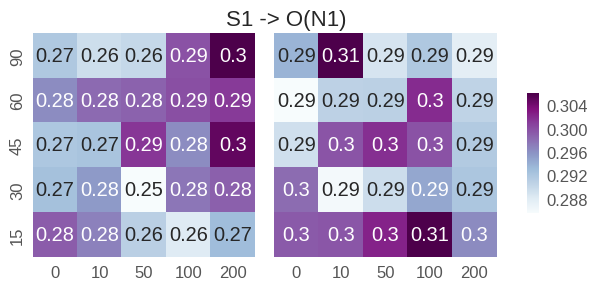

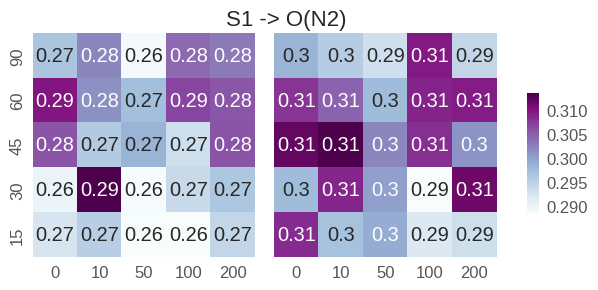

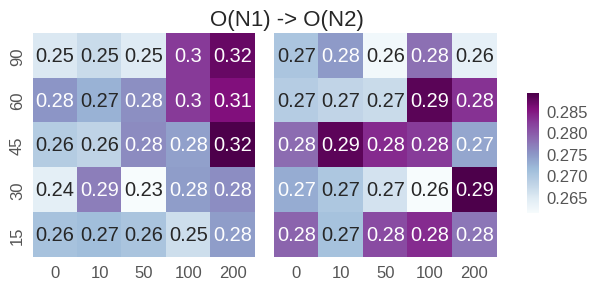

In [65]:
# plotHeatmap(df[df['nu']==100], col='m1s', x='sG',y='tauv', cmap='viridis', vmax=None)
# plt.savefig(PAPER + 'MI1_before.pdf')
# plotHeatmap(df[(df['nu']==100)], col='m1e', x='sG',y='tauv', cmap='viridis', vmax=None)
# plt.savefig(PAPER + 'MI1_after.pdf')
# plotHeatmap(df[(df['nu']==100)], col='m1e0', x='sG',y='tauv', cmap='viridis', vmax=None)
# plt.savefig(PAPER + 'MI1_after0.pdf')
# vmax = np.max(np.max(df[['m2e', 'm1e', 'm1s', 'm2s']]))
cols = ['m1', 'm2', 'mx']
# fig, ax = plt.subplots(figsize=(5,5))  
plotGrid2(df[(df['nu']==100) ], 'm1', 'S1 -> O(N1)', cmap="BuPu", cols = cols)
plotGrid2(df[(df['nu']==100) ], 'm2', 'S1 -> O(N2)', cmap="BuPu", cols = cols)
plotGrid2(df[(df['nu']==100) ], 'mx', 'O(N1) -> O(N2)', cmap="BuPu", cols = cols)

# plt.savefig(PAPER + 'fig4-csd.eps')

In [28]:
df[(df['nu']==100) ]

,nu,tauv,ratio,sG,N,argmax,max,m1,m2,mx,f1,p1,f2,p2,begin
3,100.0,15.0,0.2,0.0,2000.0,9.0,1.911661,0.04,0.04,0.05,173.102530,11.483346,179.760320,9.713520,False
7,100.0,15.0,0.2,10.0,2000.0,9.0,3.443194,0.04,0.04,0.07,153.129161,8.111348,179.760320,7.714973,False
11,100.0,15.0,0.2,50.0,2000.0,9.0,3.926521,0.04,0.04,0.09,173.102530,11.691943,173.102530,10.704146,False
15,100.0,15.0,0.2,100.0,2000.0,9.0,4.774048,0.04,0.04,0.12,179.760320,10.014488,179.760320,11.470074,False
19,100.0,15.0,0.2,200.0,2000.0,9.0,4.495798,0.04,0.04,0.14,179.760320,10.984270,179.760320,10.328598,False
23,100.0,30.0,0.2,0.0,2000.0,8.0,0.615362,0.04,0.05,0.05,179.760320,11.771783,133.155792,12.061644,False
27,100.0,30.0,0.2,10.0,2000.0,7.0,0.620689,0.04,0.05,0.05,179.760320,12.482227,139.813582,11.757016,False
31,100.0,30.0,0.2,50.0,2000.0,7.0,2.730182,0.04,0.05,0.04,193.075899,7.947171,133.155792,12.174325,False
35,100.0,30.0,0.2,100.0,2000.0,8.0,3.218148,0.04,0.05,0.05,159.786951,9.799472,146.471372,9.907978,False
39,100.0,30.0,0.2,200.0,2000.0,8.0,5.416226,0.04,0.04,0.06,153.129161,11.614792,153.129161,11.763199,False
